<img align="left" style="padding-right:10px;" width="150" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Star_Wars_Logo.svg/320px-Star_Wars_Logo.svg.png" />

*elaborado por Ferran Carrascosa Mallafrè.*

< [Colecciones de objetos: listas, tuplas y diccionarios](modulo1_tema4_Py_30_colec_obj.ipynb) | [Índice](modulo1_tema4_Py_00_indice.ipynb) | [Colecciones de objetos: pandas](modulo1_tema4_Py_32_pandas.ipynb) >

__[Abre en Colab](https://colab.research.google.com/github/griu/init_python_b1/blob/master/modulo1_tema4_Py_31_numpy.ipynb)__   *: <span style="color:rgba(255, 99, 71, 0.8)">Padawan! Cuando inicies sesión en Colab, prepara el entorno ejecutando el siguiente código.</span>*

# Preparación del entorno

¡Padawan! Cuando inicies sesión en Colab, prepara el entorno ejecutando el siguiente código:

In [ ]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/griu/init_python_b1.git /content/init_python_b1
    !git -C /content/init_python_b1 pull
    %cd /content/init_python_b1

# 5 - Numpy

El package [numpy](https://numpy.org/) es la solución más popular dentro de Python para realizar computación científica.

Recoge las mejores prácticas introducidas en las Listas y organizadas para realizar cálculos de forma eficiente. Se estructuran como vectores o arrays de N, dimensiones de un mismo tipo de dato.

El primer paso que realizaremos será cargar la librería, habitualmente, con *namespace* `np`:

In [2]:
import numpy as np

##### 5.1. Actividad Guiada 2.3

Antes de entrar en materia, vamos a presentar la actividad guiada de *numpy*.

Se trata de seleccionar la nave interestelar más rápida en MGLT (Megaluz/Hora), que pueda llevar a 4 tripulantes (como los protagonistas: Han Solo, Leia, Luke y Chewbacca). Además, el coste de la nave debe ser com máximo 1M de créditos interestelares.

>     «Es la chatarra más veloz de la galaxia.» 
    ―Lando Calrissian
    
Lando se refería al Halcón Milenario. ¿Será verdad?

Para esta actividad contamos con los siguiente datos em formato pandas:

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # para el estilo de graficos

entidades = ['planets','starships','vehicles','people','species']
entidades_df = {x: pd.read_pickle('www/' + x + '_df.pkl') for x in entidades}
starships_df = entidades_df['starships'][["cost_in_credits","MGLT","crew"]].dropna()

starships_df

,cost_in_credits,MGLT,crew
name,,,
CR90 corvette,3.500000e+06,60.0,165.0
Star Destroyer,1.500000e+08,60.0,47060.0
Sentinel-class landing craft,2.400000e+05,70.0,5.0
Death Star,1.000000e+12,10.0,342953.0
Millennium Falcon,1.000000e+05,75.0,4.0
Y-wing,1.349990e+05,80.0,2.0
X-wing,1.499990e+05,100.0,1.0
Executor,1.143350e+09,40.0,279144.0
Imperial shuttle,2.400000e+05,50.0,6.0


Transformamos la matriz numpy con las variables numéricas:

In [ ]:
starship_np = starships_df.values
starship_np # las filas son las naves y las columnas: cost_in_credits, MGLT y crew

array([[3.50000e+06, 6.00000e+01, 1.65000e+02],
       [1.50000e+08, 6.00000e+01, 4.70600e+04],
       [2.40000e+05, 7.00000e+01, 5.00000e+00],
       [1.00000e+12, 1.00000e+01, 3.42953e+05],
       [1.00000e+05, 7.50000e+01, 4.00000e+00],
       [1.34999e+05, 8.00000e+01, 2.00000e+00],
       [1.49999e+05, 1.00000e+02, 1.00000e+00],
       [1.14335e+09, 4.00000e+01, 2.79144e+05],
       [2.40000e+05, 5.00000e+01, 6.00000e+00],
       [8.50000e+06, 4.00000e+01, 8.54000e+02],
       [1.04000e+08, 6.00000e+01, 5.40000e+03],
       [1.75000e+05, 1.20000e+02, 1.00000e+00],
       [2.20000e+05, 9.10000e+01, 1.00000e+00],
       [1.55000e+05, 1.00000e+02, 3.00000e+00]])

Transformamos los nombres de las naves a array numpy:

In [ ]:
starship_names = starships_df.index.values 
starship_names

array(['CR90 corvette', 'Star Destroyer', 'Sentinel-class landing craft',
       'Death Star', 'Millennium Falcon', 'Y-wing', 'X-wing', 'Executor',
       'Imperial shuttle', 'EF76 Nebulon-B escort frigate',
       'Calamari Cruiser', 'A-wing', 'B-wing', 'arc-170'], dtype=object)

#### 5.2. Tipo de datos en Numpy
Habitualmente, se crean a partir de listas o tuplas con elementos homogéneos:

In [ ]:
b_np = np.array([True, False, False]) # booleano
b_np

array([ True, False, False])

In [ ]:
s_np = np.array(['f', 'h', 'j']) # string
s_np

array(['f', 'h', 'j'], dtype='<U1')

In [ ]:
i_np = np.array(range(3)) # entero
i_np

array([0, 1, 2])

In [ ]:
f_np = np.array([2.4, 1.5, 3.0]) # coma flotante
f_np

array([2.4, 1.5, 3. ])

Los 4 objetos comparten ser de tipo `numpy.ndarray`:

In [ ]:
ej_np = (b_np, s_np, i_np, f_np)
[type(x) for x in ej_np]

[numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray]

Sin embargo, cada uno tiene un tipo interno accesible con el método `.dtype`:

In [ ]:
[x.dtype for x in ej_np]

[dtype('bool'), dtype('<U1'), dtype('int64'), dtype('float64')]

Observa que numpy define sus propios nombres para los tipos básicos donde añade el tamaño en bits:

- 'U1' es texto Unicode de 1 bit.
- 'int64', 'float64' numéricos de 64 bits. 

Se puede definir este tipo en su construcción: 

In [ ]:
i_np = np.array(range(3), dtype='int16')
i_np

array([0, 1, 2], dtype=int16)

O convertir el numpy de un tipo interno a otro en un nuevo objeto con `.astype()`:

In [ ]:
s_i_np = i_np.astype(str)
s_i_np

array(['0', '1', '2'], dtype='<U6')

El tipo de la matriz numérica de las naves es:

In [ ]:
starship_np.dtype

dtype('float64')

El vector de nombres tiene dtype object. Este tipo se utiliza para numpy de texto:

In [ ]:
starship_names.dtype

dtype('O')

Así, se ve mejor:

In [ ]:
print(starship_names.dtype)

object


#### 5.3. Funciones Universales

En numpy, las funciones universales o *ufunc*, son un conjunto de funciones que vectorizan, es decir, que al aplicarlas sobre un objeto numpy, se aplica sobre cada uno de los elementos que lo componen. 

> **Recuerda**: Ya comentamos las funciones que vectorizan, en el capitulo de funciones de R. 

Típicamente, las funciones de este tipo son las funciones aritméticas:

In [ ]:
np.array([1,2,3]) * 2  # multiplicación por escalar

array([2, 4, 6])

In [ ]:
np.array([1,2,3]) + np.array([4,5,6]) # suma vectores

array([5, 7, 9])

In [ ]:
np.array([1,2,3]) * np.array([4,5,6]) # producto elemento a elemento

array([ 4, 10, 18])

NumPy ofrece una extensa colección de funciones matemáticas que se aplican de forma vectorial. Algunas de ellas son:  `abs`,`sign`, `sqrt`, `log`, `log10`, `exp`, `sin`, `cos`, `tan`, `arcsin`, `arccos`, `arctan`, `sinh`, `cosh`, `tanh`, `arcsinh`, `arccosh` y `arctanh`.

In [ ]:
np.sqrt(np.array([1,2,3,4]))

array([1.        , 1.41421356, 1.73205081, 2.        ])

#### 5.4. Secuencias en Numpy

La función propia de numpy es `np.arange(ini,fin,paso)`:

In [ ]:
np.arange(0,6,2)

array([0, 2, 4])

Secuencias de ceros:

In [ ]:
np.zeros(3)

array([0., 0., 0.])

In [ ]:
np.ones(3)

array([1., 1., 1.])

Repetir todo el vector:

In [ ]:
a = [1,2,3]
b = np.tile(a, 4)
b

array([1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3])

Repetir cada elemento de un vector:

In [ ]:
a = [1,2,3]
b = np.repeat(a, 4)
b

array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])

#### 5.5. Dimensiones en Numpy

In [ ]:
np.random.seed(123)  # Semilla para poder reproducir

x1 = np.random.randint(10, size=6)  # array 1-dimensional 
x2 = np.random.randint(10, size=(3, 4))  # array 2-dimensional
x3 = np.random.randint(10, size=(3, 4, 5))  # array 3-dimensional 

In [ ]:
print("x3 número dimensiones: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 número de elmentos: ", x3.size)
print("X3 cantidad de bytes:", x3.nbytes, "bytes")

x3 número dimensiones:  3
x3 shape: (3, 4, 5)
x3 número de elmentos:  60
X3 cantidad de bytes: 480 bytes


Nuestra matriz de naves interestelares:

In [ ]:
print("Naves número dimensiones: ", starship_np.ndim)
print("Nombres número dimensiones: ", starship_names.ndim)
print("Naves shape:", starship_np.shape)
print("Nombres shape:", starship_names.shape)
print("Naves número de elmentos: ", starship_np.size)
print("Nombres número de elmentos: ", starship_names.size)
print("Naves cantidad de bytes:", starship_np.nbytes, "bytes")
print("Nombres cantidad de bytes:", starship_names.nbytes, "bytes")

Naves número dimensiones:  2
Nombres número dimensiones:  1
Naves shape: (14, 3)
Nombres shape: (14,)
Naves número de elmentos:  42
Nombres número de elmentos:  14
Naves cantidad de bytes: 336 bytes
Nombres cantidad de bytes: 112 bytes


### 5.6. Filtros en Numpy

Siguen las mismas reglas que en las listas pero, ahora, con más dimensiones:

In [ ]:
x2

array([[6, 1, 0, 1],
       [9, 0, 0, 9],
       [3, 4, 0, 0]])

Elemento de la matriz:

In [ ]:
x2[0, 0]

6

#### 5.6.1. Filtros Slicing

Vector segunda columna:

In [ ]:
x2[:,1]

array([1, 0, 4])

Vector tercera fila:

In [ ]:
x2[2,:]

array([3, 4, 0, 0])

O, la misma fila, por omisión del segundo elemento:

In [ ]:
x2[2]

array([3, 4, 0, 0])

En nuestras naves, las columnas eran: cost_in_credits, MGLT, crew.

Para acceder a la velocidad (MGLT):

In [ ]:
starship_np[:,1]

array([ 60.,  60.,  70.,  10.,  75.,  80., 100.,  40.,  50.,  40.,  60.,
       120.,  91., 100.])

Para seleccionar la 5ª nave, se selecciona una fila 4:

In [ ]:
starship_np[4,:]

array([1.0e+05, 7.5e+01, 4.0e+00])

Para ver su nombre:

In [ ]:
starship_names[4]

'Millennium Falcon'

#### 5.6.2. Indexación Elegante



##### 5.6.2.1. Filtros Posicionales

Otra mejora respecto a las listas es la capacidad de indexar por una lista o array.

Para filtrar por un array unidimensional de posiciones:

In [ ]:
x1

array([2, 2, 6, 1, 3, 9])

In [ ]:
ind = [0,2,5]
x1[ind]

array([2, 6, 9])

> **Recuerda**: En el objeto list, esta operación no es posible. En su lugar, se utilizan las list comprehension.

En dos dimensiones, a diferencia de lo visto en R, se aparean por coordenadas filas y columnas, es lo que se llama Broadcasting. Lo veremos más adelante:

In [ ]:
x2

array([[6, 1, 0, 1],
       [9, 0, 0, 9],
       [3, 4, 0, 0]])

In [ ]:
fils = np.array([0,1])
cols = np.array([0,3])

x2[fils,cols]

array([6, 9])

> **Recuerda**: en arrays numpy los filtros por posición, se seleccionan apareando coordenadas fila y columna. Ve a la sección de Broadcasting, para saber más.

En R se obtendría el siguiente resultado:

In [ ]:
x2[fils,:][:,cols]

array([[6, 1],
       [9, 9]])

##### 5.6.2.2. Filtros Lógicos 

Otro mecanismo *fancy indexing* son los filtros lógicos. 

Antes, recordemos que para obtener el número de tripulantes (crew): 

In [ ]:
starship_np[:,2]

array([1.65000e+02, 4.70600e+04, 5.00000e+00, 3.42953e+05, 4.00000e+00,
       2.00000e+00, 1.00000e+00, 2.79144e+05, 6.00000e+00, 8.54000e+02,
       5.40000e+03, 1.00000e+00, 1.00000e+00, 3.00000e+00])

Para saber cuáles son las naves de 4 o más tripulantes:

In [ ]:
starship_np[:,2] >= 4

array([ True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False, False, False])

Si queremos rescatar sus nombres:

In [ ]:
starship_names[starship_np[:,2] >= 4]

array(['CR90 corvette', 'Star Destroyer', 'Sentinel-class landing craft',
       'Death Star', 'Millennium Falcon', 'Executor', 'Imperial shuttle',
       'EF76 Nebulon-B escort frigate', 'Calamari Cruiser'], dtype=object)

Continúan funcionando los operadores distinto `!=`, en `in`, no en `not in`.

In [ ]:
'Millennium Falcon' in starship_names[starship_np[:,2] >= 4]

True

> Para reproducir el mismo comportamiento que el operador `a %in% b` de R se utiliza `np.isin(a, b)`:

In [ ]:
a = np.array([1, 2, 3, 4])
b = np.array([3, 4, 5])
np.isin(a,b)

array([False, False,  True,  True])

##### 5.6.2.3. Operaciones Booleanas 

Utilizamos los `&`, `|` y `~` en vez de los `and`, `or`, `not` (respec.) utilizados en los tipos lógicos. Será necesario cerrar las expresiones entre paréntesis. 

Por ejemplo:

```
( A > 1 ) |  ( B < 5)
```

Respecto a nuestras naves, las que tienen 4 o más tripulantes y que cuestan menos de 1M de créditos:

In [ ]:
starship_names_sel = starship_names[(starship_np[:,2] >= 4) & (starship_np[:,0] <10**6)]
starship_names_sel

array(['Sentinel-class landing craft', 'Millennium Falcon',
       'Imperial shuttle'], dtype=object)

> **Recuerda**: las dos expresiones van entre paréntesis.

Ahora, filtramos la matriz de datos de estas naves:

In [ ]:
starship_np_sel = starship_np[(starship_np[:,2] >= 4) & (starship_np[:,0] <10**6), :]
starship_np_sel

array([[2.4e+05, 7.0e+01, 5.0e+00],
       [1.0e+05, 7.5e+01, 4.0e+00],
       [2.4e+05, 5.0e+01, 6.0e+00]])

Gráficamente:

In [ ]:
starship_names_sel

array(['Sentinel-class landing craft', 'Millennium Falcon',
       'Imperial shuttle'], dtype=object)

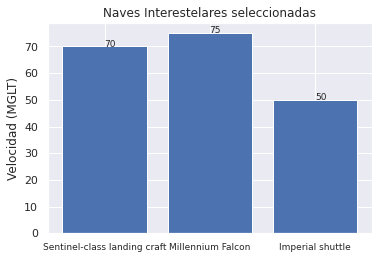

In [ ]:
ind = np.arange(len(starship_names_sel))    # posiciones

plt.bar(ind, starship_np_sel[:,1] );

for i in ind:
    plt.text(ind[i],starship_np_sel[i,1], int(starship_np_sel[i,1]),size=9)

plt.gcf().subplots_adjust(left=0.15,bottom=0.15)
plt.ylabel('Velocidad (MGLT)')
plt.title('Naves Interestelares seleccionadas')
p = plt.xticks(ind, starship_names_sel,fontsize=9);


¡Parece que el Halcón Milenario con 75 MGLT, es la nave que andábamos buscando!

### 5.7. Modificar Arrays

Para modificar un valor de un array:

In [ ]:
x2

array([[6, 1, 0, 1],
       [9, 0, 0, 9],
       [3, 4, 0, 0]])

In [ ]:
x2[1,1] = 20
x2

array([[ 6,  1,  0,  1],
       [ 9, 20,  0,  9],
       [ 3,  4,  0,  0]])

Mucha precaución con el tipo interno del numpy ya que es fijo. No se va a modificar:

In [ ]:
x2[1,1] = 20.765
x2

array([[ 6,  1,  0,  1],
       [ 9, 20,  0,  9],
       [ 3,  4,  0,  0]])

> **Recuerda**: Si intentas insertar un valor en coma flotante sobre un numpy con tipo entero, éste se va a cortar.

Se pueden modificar N valores con un vector de N posiciones.

In [ ]:
x2[1,:] = x2[0,:] * 10 
x2

array([[ 6,  1,  0,  1],
       [60, 10,  0, 10],
       [ 3,  4,  0,  0]])

También, se pueden modificar varios a la vez, con un único valor.

In [ ]:
x2[[1,2],[2,2]] = 55
x2

array([[ 6,  1,  0,  1],
       [60, 10, 55, 10],
       [ 3,  4, 55,  0]])

#### 5.7.1. Vistas no copiadas

Cuando se asigna un array numpy a otro objeto, ya sea filtrado con `[,]` o no, éste retorna una vista, no una copia. Es muy importante tenerlo en cuenta, cuando se modifica el objeto:


In [3]:
a = np.array([1, 'm', [2, 3, 4]], dtype=object)
b = a
b[0] = 10
a

array([10, 'm', list([2, 3, 4])], dtype=object)

> **Importante**: Los cambios en una vista no copiada, afectan a todas las copias.

#### 5.7.2. Copias de Arrays 

Para copiar un array a otro objeto utiliza `copy()`:


In [4]:
c = a.copy() # COPIAS DE ARRAYS
c[0] = 20
print(a)

[10 'm' list([2, 3, 4])]


Ahora, el objeto original, no cambia. Pero no es perfecto!

In [5]:
c[2][0] = 30
print(a)

[10 'm' list([30, 3, 4])]


Internamente continua utilizando referencias a los mismos objetos.

#### 5.7.2.1 Copias profundas de Arrays 

Veamos en que consiste.

In [6]:
import copy
d = copy.deepcopy(a)
d[2][0] = 40
print(a)


[10 'm' list([30, 3, 4])]


Ahora copia la estructura interna.

#### 5.7.3. Cambios de *Shape*

Con `.reshape()` se puede modificar las dimensiones del array:

In [ ]:
x1

array([2, 2, 6, 1, 3, 9])

In [ ]:
x1.reshape(2,3)

array([[2, 2, 6],
       [1, 3, 9]])

#### 5.7.4. Concatenar Arrays

Para concatenar 2 arrays unidimensionales:


In [ ]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [ ]:
grid = np.arange(6).reshape(2,3)

# concatenar filas, (axis = 0)
np.concatenate([grid, grid])

array([[0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5]])

In [ ]:
# concatenar columnas, (axis = 1)
np.concatenate([grid, grid], axis=1)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

Lo mismo con vstack y hstack, pero con arrays de distinta dimensión:

In [ ]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# apilado vertical
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [ ]:
# apilado horizontal
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

####  5.7.5. Broadcasting de Arrays

El Broadcasting es una operación de alineamiento que sigue, de forma estricta, las siguientes reglas de interacción entre 2 arrays:

- **Regla 1**: si dos arrays difieren en el número de dimensiones, el shape (dimensiones) del que tenga menor dimensión se aumenta con unos por la izquierda:
```
[3,1,6] x [2,6] ----> [3,1,6] x [1,2,6]
[3,5,4] x [3,5] ----> [3,5,4] x [1,3,5]
```
- **Regla 2**: si dos arrays tienen shape distinto en alguna dimensión, el array con shape igual a 1 se estira (copia) para que concuerde con el de la misma dimensión del otro array:

```
[3,1,6] x [1,2,6] ----> [3,2,6] x [3,2,6]
[3,5,4] x [1,3,5] ----> [3,5,4] x [3,3,5]
```
- **Regla 3**: si alguna dimensión tiene tamaño distinto y no hay ninguna dimensión 1, se lanza un error:
```
[3,2,6] x [3,2,6] ----> Concuerdan
[3,5,4] x [3,3,5] ----> Error !!!
```

En la práctica, esto significa facilitar algunas operaciones:

In [ ]:
a = np.ones((2,2))
a

array([[1., 1.],
       [1., 1.]])

In [ ]:
b =  np.tile(0.5, 2)
b

array([0.5, 0.5])

In [ ]:
a - b

array([[0.5, 0.5],
       [0.5, 0.5]])

#### 5.7.6. Conversión a Listas

Los numpy se convierten a lista con `.tolist()`:

In [ ]:
a = np.array([2,3,7,3])
b = a.tolist()
b

[2, 3, 7, 3]

In [ ]:
type(b)

list

#### 5.7.7. Valores Faltantes  

Por definición, un NaN es un número en coma flotante, distinto a cualquier otro número:

In [ ]:
np.nan != np.nan

True

In [ ]:
a = np.arange(6).reshape(3,2) * 1.0

a[[1,2],[1] ] = np.nan

a

array([[ 0.,  1.],
       [ 2., nan],
       [ 4., nan]])

> **Observa**: se ha aplicado broadcast al asignar `np.nan`. 

In [ ]:
np.isnan(a)

array([[False, False],
       [False,  True],
       [False,  True]])

Numpy es la base de la computación con arrays. Veamos ahora qué aportan los objetos **pandas**.

< [Colecciones de objetos: listas, tuplas y diccionarios](modulo1_tema4_Py_30_colec_obj.ipynb) | [Índice](modulo1_tema4_Py_00_indice.ipynb) | [Colecciones de objetos: pandas](modulo1_tema4_Py_32_pandas.ipynb) >

__[Abre en Colab](https://colab.research.google.com/github/griu/init_python_b1/blob/master/modulo1_tema4_Py_31_numpy.ipynb)__